In [ ]:
Pull Augmented data from folders via data generators

In [1]:
%load_ext autoreload
%autoreload 2

### Set data-files path

In [2]:
import os

In [3]:
pwd_ = os.getcwd()
#pwd_

In [4]:
path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(pwd_))))))
print(path)

D:\


In [5]:
dest_data_folder = os.path.join(os.path.join(path, "Warehouse"), "cats_and_dogs")

train_dir = os.path.join(dest_data_folder, "train")
cat_train_dir = os.path.join(train_dir, "cat")
dog_train_dir = os.path.join(train_dir, "dog")


test_dir = os.path.join(dest_data_folder, "test")
cat_test_dir = os.path.join(test_dir, "cat")
dog_test_dir = os.path.join(test_dir, "dog")


validation_dir = os.path.join(dest_data_folder, "validation")
cat_validation_dir = os.path.join(validation_dir, "cat")
dog_validation_dir = os.path.join(validation_dir, "dog")

In [6]:
print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_train_dir)))

print(len(os.listdir(cat_test_dir)))
print(len(os.listdir(dog_test_dir)))


print(len(os.listdir(cat_validation_dir)))
print(len(os.listdir(dog_validation_dir)))


2000
2000
1000
1000
1000
1000


### Network

In [7]:
from keras.models import Sequential
from keras import layers

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### preprocess data

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_IDG = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


train_DataGen = train_IDG.flow_from_directory(
                train_dir,
                target_size = (150,150),
                batch_size=32,
                class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [12]:
validation_DataGen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_DG = validation_DataGen.flow_from_directory(
        # This is the target directory
        validation_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


### Get the training going

In [13]:
history = model.fit_generator(
            generator=train_DataGen,
            validation_data=valid_DG,
            steps_per_epoch=20,
            epochs=10,
            validation_steps=50)

Epoch 1/10
20/20 [==============================] - 79s 4s/step - loss: 0.7100 - acc: 0.4859 - val_loss: 0.6932 - val_acc: 0.4906
Epoch 2/10
20/20 [==============================] - 76s 4s/step - loss: 0.6936 - acc: 0.4844 - val_loss: 0.6930 - val_acc: 0.5126
Epoch 3/10
20/20 [==============================] - 81s 4s/step - loss: 0.6934 - acc: 0.4891 - val_loss: 0.6933 - val_acc: 0.4886
Epoch 4/10
20/20 [==============================] - 87s 4s/step - loss: 0.6939 - acc: 0.4516 - val_loss: 0.6931 - val_acc: 0.4981
Epoch 5/10
20/20 [==============================] - 89s 4s/step - loss: 0.6932 - acc: 0.4844 - val_loss: 0.6932 - val_acc: 0.4888
Epoch 6/10
20/20 [==============================] - 84s 4s/step - loss: 0.6932 - acc: 0.4812 - val_loss: 0.6931 - val_acc: 0.5095
Epoch 7/10
20/20 [==============================] - 78s 4s/step - loss: 0.6932 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 8/10
20/20 [==============================] - 77s 4s/step - loss: 0.6933 - acc: 0.47

In [15]:
import matplotlib.pyplot as plt

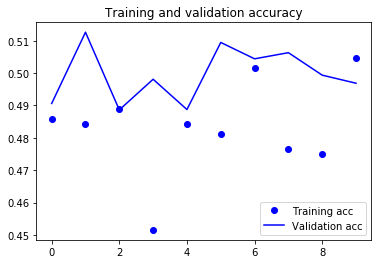

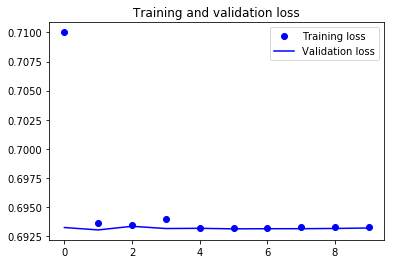

In [16]:


acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
